# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


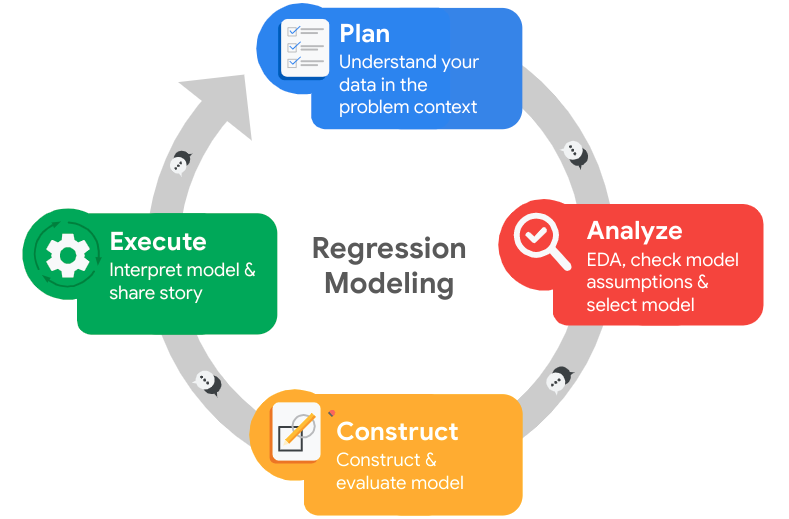

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**1.**
* **Primary Stakeholders:** **Salifort's Senior Leadership Team**: They’re the project sponsors who will use the results to make strategic decisions.
* **Secondary Stakeholders:**
    * **The HR Department:** They’ll be responsible for implementing the recommended retention strategies.
    * **Department Managers:** Their teams are directly affected, and they will help implement specific changes.
    * **All Salifort Employees:** They are the group most affected by the project's outcomes.

**2.**
* I'm working to address the high employee turnover rate at Salifort Motors. The primary objectives are:
    * Identify key drivers of turnover by analyzing employee survey data.
    * Predict future departures by building a predictive model based on various data points.
    * Provide actionable insights and recommendations to improve retention.
* The goal is to reduce turnover, lower recruitment and training costs, and maintain a skilled workforce, supporting Salifort Motors' competitiveness and innovation in the alternative energy vehicle market.

**3.**
* **Significant Turnover:** The dataset confirms a high turnover rate, with nearly a quarter of the employees having left the company.
* **Low Satisfaction is a Major Factor:** Employees who left had significantly lower satisfaction levels than those who remained.
* **Two Distinct Leaver Profiles Emerge:**
    * **Overworked High-Performers:** Good employees with high evaluations and long work hours are leaving.
    * **Under-utilized Low-Performers:** Employees with few projects and low evaluations are also leaving.
* **Tenure is a Critical Factor:** Turnover peaks among employees with 3 to 5 years of experience at the company.
* **Salary and Promotions Have a Strong Impact:** Employees with low salaries and those who haven't been promoted in the last five years are far more likely to leave.
* **The Data is Clean:** The dataset is complete and well-formatted, with no missing values, making it reliable for modeling.

**4.**
* **Project-Specific Documents:** The primary resources are the project description and the dataset
* **Domain Knowledge Resources:** To understand the business context of employee turnover and inform initial hypotheses: [Employee Turnover Analysis with Data Visualization](https://www.boldbi.com/resources/blog/mastering-employee-turnover-analysis-with-data-visualization/)

**5.**
* **Data Privacy:** The dataset contains sensitive employee information. The plan must ensure this data is handled securely and that any reports or visualizations are aggregated to protect the identity and confidentiality of every individual.
* **Fairness and Bias:** The model must be checked for biases to ensure it does not unfairly disadvantage any group of employees. For example, it should not be more likely to flag employees from a specific department or salary level if it's not statistically justified, as this could lead to discriminatory treatment.
* **Purpose and Use:** The model's predictions must be used constructively. The plan must state that the goal is to identify and address systemic issues (like burnout or lack of growth opportunities) and to guide supportive interventions, not to single out or penalize employees who are flagged as being at risk of leaving.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={
    'average_montly_hours': 'average_monthly_hours',
    'Work_accident': 'work_accident',
    'Department': 'department'
}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum().sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
num_duplicates = df0.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 3008


In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicates = df0[df0.duplicated(keep=False)]
# Sort the duplicates by all columns to group them together
sorted_duplicates = duplicates.sort_values(by=list(df0.columns))
sorted_duplicates.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
278,0.09,0.78,6,254,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable (df) as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(f"New dataframe shape after dropping duplicates: {df.shape}")

New dataframe shape after dropping duplicates: (11991, 10)


### Check outliers

Check for outliers in the data.

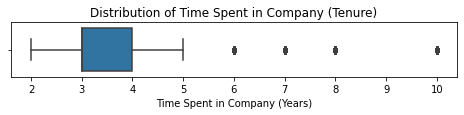

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(8, 1))
sns.boxplot(x=df['time_spend_company'])
plt.title('Distribution of Time Spent in Company (Tenure)')
plt.xlabel('Time Spent in Company (Years)')
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
Q1 = df.time_spend_company.quantile(.25)
Q3 = df.time_spend_company.quantile(.75)
IQR = Q3 - Q1
# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df.time_spend_company < lower_bound) | (df.time_spend_company > upper_bound)]
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Number of rows containing outliers in 'time_spend_company': {len(outliers)}")

Lower Bound for Outliers: 1.5
Upper Bound for Outliers: 5.5
Number of rows containing outliers in 'time_spend_company': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**1.**
* **Satisfaction Level:** There is a strong, direct relationship; as satisfaction level decreases, the likelihood of an employee leaving increases.
* **Evaluation & Monthly Hours:** This relationship isn't a straight line. Turnover is high for employees at both extremes: those with low evaluation scores and few hours, and those with very high evaluation scores and long hours.
* **Salary and Promotions:** Employees with low salaries are far more likely to leave than those with medium or high salaries. Similarly, employees who have not been promoted in the last five years have a much higher turnover rate.
* **Company Tenure:** The relationship is non-linear. The highest turnover risk is concentrated among employees with 3 to 5 years of tenure.

**2.**
* **Target Variable (`left`):** The distribution is imbalanced, with significantly more employees who stayed (83.4%) than who left (16.6%).

* **`satisfaction_level`:** The distribution for employees who left is clustered at the low end of the satisfaction scale (0.1 to 0.5).

* **`last_evaluation` and `average_monthly_hours`:** The distributions for employees who left are strongly bimodal (two-peaked). This reveals two distinct groups: an under-worked/low-performing group and an overworked/high-performing group. In contrast, the distributions for employees who stayed are unimodal (single-peaked).

* **`time_spend_company` (Tenure):** The distribution is right-skewed, meaning most employees have a tenure of 2-4 years, with a long tail of fewer employees who have stayed for many more years.

**3.** Here are the data transformations I have made and the reasons for them:
* **Standardized Column Names:** I renamed columns to be in a consistent snake_case format and corrected misspellings (e.g., `average_montly_hours` to `average_monthly_hours`). This ensures the data is clean, consistent, and easy to work with in code, preventing errors.
* **Removed Duplicate Rows:** I identified and dropped 3,008 duplicate rows from the dataset. This was a critical step to prevent our analysis and future model from being biased by repeated information, ensuring the integrity of our results.
* The next planned transformation will be to encode categorical variables (`department` and `salary`) into a numerical format so they can be used by our machine learning model.

**4.**
* **Data Cleaning and Validation:** To identify and handle issues like missing values, duplicates, and outliers that could negatively impact the model's performance.
* **Feature Selection and Engineering:** To understand which variables have the strongest relationship with the outcome you are trying to predict, helping you choose the most relevant features and inspiring the creation of new ones.
* **Checking Model Assumptions:** To verify that the data meets the underlying assumptions of the specific model we plan to use (e.g., checking for linearity for linear models or multicollinearity between predictors).
* **Informing Model Strategy:** To understand the structure of the data (e.g., class imbalance, non-linear relationships), which helps in choosing the right type of model and the most appropriate metrics for evaluating its success.

**5.**
* **Python Libraries for Analysis and Visualization:** These were the main tools used to explore the data and generate insights.
* **Statistical and EDA Principles:** My internal knowledge of data analysis techniques was used to guide the exploration, choose the right visualizations, and interpret the results effectively.

**6.**
* **Avoiding Confirmation Bias:** I must remain objective and avoid seeking out only the data that confirms my initial hypotheses, ensuring a balanced and honest interpretation of the findings.
* **Data Privacy:** All visualizations and summary statistics must be created in a way that protects the privacy of individuals. This means ensuring that no single person's data can be identified from the plots.
* **Accurate Representation:** I have a responsibility to represent the data accurately and without distortion. This involves using clear, non-misleading charts and providing full context to avoid misinterpretation or the creation of harmful stereotypes about any group of employees.
* **Identifying Potential Bias:** During this stage, I must actively look for strong correlations between variables (e.g., between `department` and `salary`) that could introduce unintended bias into a future model, and document them for later consideration. 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print("Number of people who left vs. stayed:")
print(df.left.value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("\nPercentage of people who left vs. stayed:")
print(df.left.value_counts(normalize=True) * 100)

Number of people who left vs. stayed:
0    10000
1     1991
Name: left, dtype: int64

Percentage of people who left vs. stayed:
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

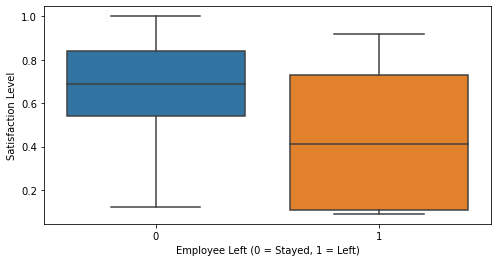

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
# Satisfaction Level vs. Turnover (Box Plot)
plt.figure(figsize=(8, 4))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.xlabel('Employee Left (0 = Stayed, 1 = Left)')
plt.ylabel('Satisfaction Level')
plt.show()

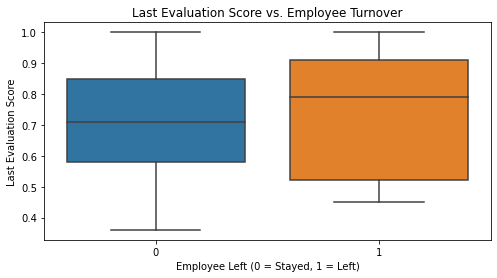

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
# Last Evaluation vs. Turnover (Box Plot)
plt.figure(figsize=(8, 4))
sns.boxplot(x='left', y='last_evaluation', data=df)
plt.title('Last Evaluation Score vs. Employee Turnover')
plt.xlabel('Employee Left (0 = Stayed, 1 = Left)')
plt.ylabel('Last Evaluation Score')
plt.show()

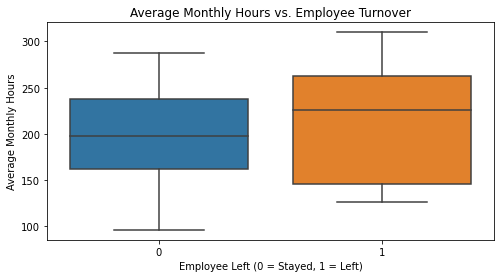

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
# Average Monthly Hours vs. Turnover (Box Plot)
plt.figure(figsize=(8, 4))
sns.boxplot(x='left', y='average_monthly_hours', data=df)
plt.title('Average Monthly Hours vs. Employee Turnover')
plt.xlabel('Employee Left (0 = Stayed, 1 = Left)')
plt.ylabel('Average Monthly Hours')
plt.show()

In [18]:
df.groupby('work_accident')['left'].mean().reset_index()

,work_accident,left
0,0,0.185978
1,1,0.056757


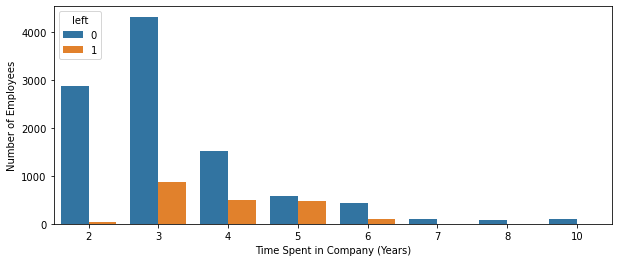

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# Time Spent in Company vs. Turnover (Count Plot)
plt.figure(figsize=(10, 4))
sns.countplot(x='time_spend_company', data=df, hue='left')
plt.xlabel('Time Spent in Company (Years)')
plt.ylabel('Number of Employees')
plt.show()

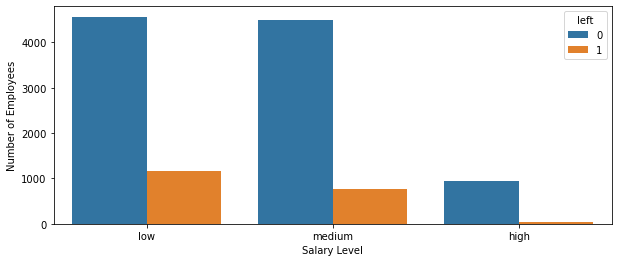

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
# Salary vs. Turnover (Count Plot)
plt.figure(figsize=(10, 4))
sns.countplot(x='salary', data=df, hue='left')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()

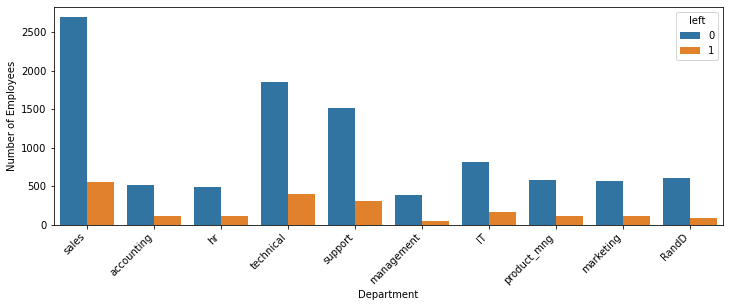

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
# Department vs. Turnover (Count Plot)
plt.figure(figsize=(12, 4))
sns.countplot(x='department', data=df, hue='left')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.show()

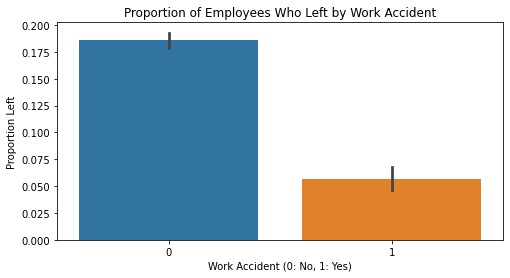

In [22]:
# Proportion of employees who left by work accident
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='work_accident', y='left')
plt.title('Proportion of Employees Who Left by Work Accident')
plt.xlabel('Work Accident (0: No, 1: Yes)')
plt.ylabel('Proportion Left')
plt.show()

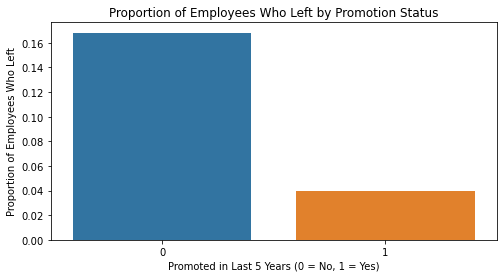

In [23]:
# Plot 4: Proportion of employees who left by promotion in last 5 years
plt.figure(figsize=(8, 4))
promotion_turnover = df.groupby('promotion_last_5years')['left'].mean().reset_index()
sns.barplot(x='promotion_last_5years', y='left', data=promotion_turnover)
plt.title('Proportion of Employees Who Left by Promotion Status')
plt.xlabel('Promoted in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Proportion of Employees Who Left')
plt.show()

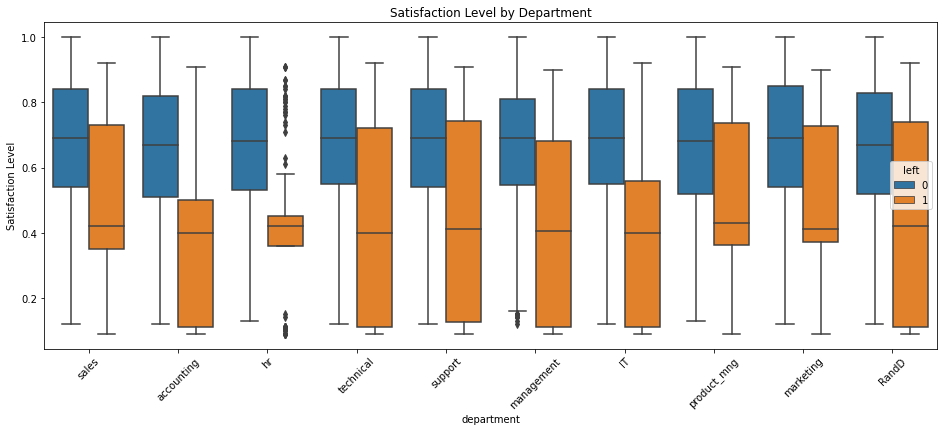

In [24]:
# Box plot of satisfaction level by department
plt.figure(figsize=(16, 6))
sns.boxplot('department', 'satisfaction_level', hue='left', data=df)
plt.title('Satisfaction Level by Department')
plt.xticks(rotation=45)
plt.ylabel('Satisfaction Level')
plt.show()

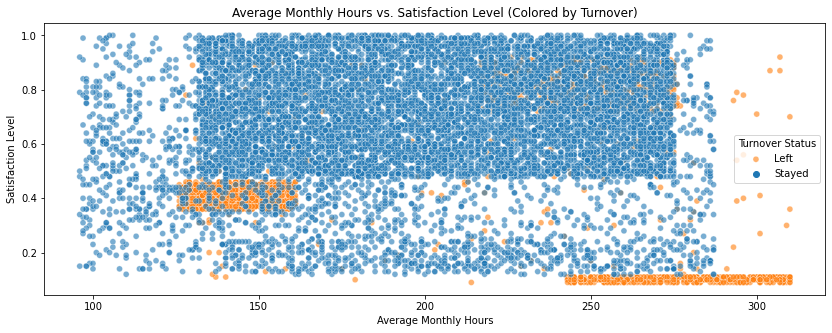

In [25]:
# Average Monthly Hours vs. Satisfaction Level
plt.figure(figsize=(14, 5))
sns.scatterplot('average_monthly_hours', 'satisfaction_level', 'left', data=df, alpha=.6)
plt.title('Average Monthly Hours vs. Satisfaction Level (Colored by Turnover)')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(title='Turnover Status', labels=['Left', 'Stayed'])
plt.show()

**1. The "Happy Stayers"**
* **Characteristics:** These employees have a satisfaction level ranging from roughly 0.5 to 0.9 and work a moderate number of hours (from ~150 to ~260 per month).
* **Insight:** This represents the core of your stable workforce: employees who are generally satisfied and have a reasonable workload tend to stay with the company.

**2. The "Unhappy Leavers"**
* **Characteristics:** These employees have a very low satisfaction level (less than 0.2) and also work fewer hours than average (~130 to ~160 hours).
* **Insight:** This group represents the "under-engaged" or "checked-out" employees. Their low satisfaction is a clear driver for leaving, and their low hours suggest they were not motivated or not being effectively utilized.

**3. The "Overworked Leavers"**
* **Characteristics:** These employees work an unsustainable number of hours (250+). Interestingly, their satisfaction levels range from very low (less than 0.2) to quite high (0.7 to 0.9).
* **Insight:** This group represents the "burned-out" employees. The most critical insight here is that even employees with high satisfaction levels will leave if their workload is too high. They are likely leaving for better work-life balance.

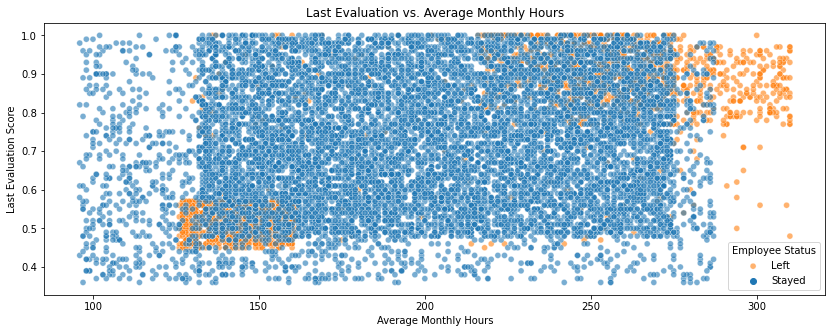

In [26]:
# Last Evaluation vs. Average Monthly Hours
plt.figure(figsize=(14, 5))
sns.scatterplot('average_monthly_hours', 'last_evaluation', 'left', data=df, alpha=.6)
plt.title('Last Evaluation vs. Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation Score')
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])
plt.show()

**1. The "Under-Performing, Under-Worked" Leavers**
* **Characteristics:** This group has low `last_evaluation` scores (below 0.6) and works a low-to-moderate number of hours (generally below 160).
* **Insight:** This is one clear profile of an employee who leaves: someone who isn't performing well and isn't heavily engaged in their work.

**2. The "High-Performing, Over-Worked" Leavers**
* **Characteristics:** This group has excellent `last_evaluation` scores (above 0.8) and works an extremely high number of hours (above 220).
* **Insight:** This is the second, more concerning profile of a leaver: the company's top performers who are assigned the heaviest workloads and are likely leaving due to burnout.

**3. The "Stable Core" of Stayers**
* **Characteristics:** Their evaluation scores and hours fall within a more "normal" or balanced range, between the two extreme clusters of leavers.
* **Insight:** This represents the core of the company where performance and workload are in a sustainable balance.

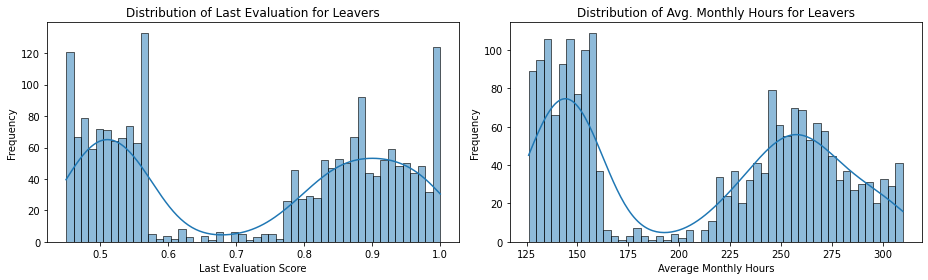

In [27]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
# Plot for last_evaluation
sns.histplot(df[df.left==1], x='last_evaluation', bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Last Evaluation for Leavers')
axes[0].set_xlabel('Last Evaluation Score')
axes[0].set_ylabel('Frequency')

# Plot for average_monthly_hours
sns.histplot(df[df.left==1], x='average_monthly_hours', bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Avg. Monthly Hours for Leavers')
axes[1].set_xlabel('Average Monthly Hours')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**1. Distribution of Last Evaluation for Leavers**
* **First Peak (Low-Performers):** Centered around a score of 0.5, this peak represents a group of employees who were likely underperforming. Their departure might be considered expected or even encouraged turnover.
* **Second Peak (High-Performers):** Centered at the very high end of the scale (0.8 to 1.0), this taller peak represents a group of top-performing employees. This is the more alarming group, as it shows the company is losing its most valuable talent.


**2. Distribution of Average Monthly Hours for Leavers**

This plot shows a corresponding bimodal distribution for the hours worked by employees who left:
* **First Peak (Under-Worked):** Centered around 130-160 hours per month, this peak represents employees who worked significantly fewer hours than the company average (~200 hours). This group aligns with the low-performers and suggests they may have been disengaged, under-utilized, or had already mentally "checked out" before leaving.
* **Second Peak (Over-Worked):** Centered around 250-280 hours per month, this peak represents employees who were clearly working very long hours. This group aligns with the high-performers and is strong evidence that they were experiencing burnout.

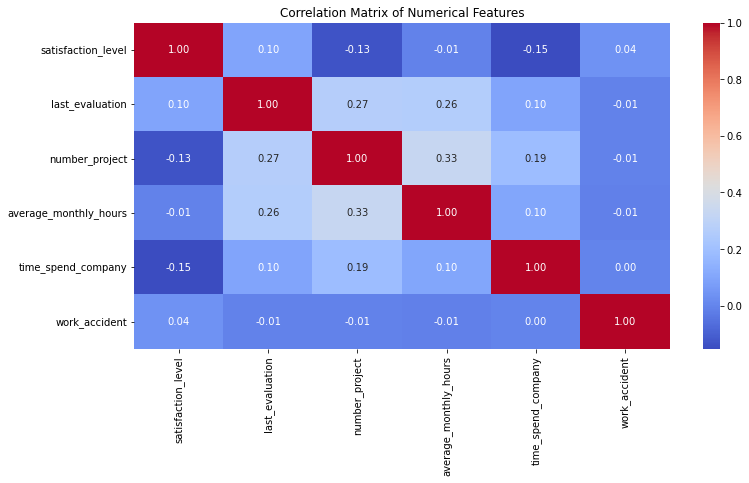

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
# Correlation Heatmap for Numerical Features
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident']
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Insights

What insights can you gather from the plots you created to visualize the data?

**1. Low Job Satisfaction is the Strongest Predictor**
* The most consistent and powerful insight is that employees with low satisfaction levels are highly likely to leave. The visualizations clearly show a direct relationship between lower satisfaction scores and the decision to resign. When we look at this by department, we see that the *sales*, *technical*, and *support* departments have a wide range of satisfaction scores, including a significant number of very dissatisfied employees, which correlates with their high turnover numbers.

**2. Two Distinct Profiles of Employees Are Leaving**
* We have identified two main groups of employees who are leaving, suggesting that a single retention strategy won't work for everyone:
    * **Burned-Out High-Performers:** These are valuable employees who have high performance evaluation scores and work an excessive number of hours (250+ per month). They are likely leaving due to burnout and a lack of work-life balance.
    * **Under-Engaged Under-Performers:** This group has low performance evaluations and works fewer hours than average. They may feel they lack opportunities, are not a good fit for their role, or are not being effectively managed.

**3. Lack of Growth and Low Pay Are Major Factors**
* The data provides clear evidence that career progression and compensation are crucial for retention:
   * **Promotions:** The turnover rate for employees who have not been promoted in the last five years is dramatically higher than for those who have.
   * **Salary:** Employees in the low salary bracket leave at a much higher rate than those with medium or high salaries.

**4. There is a Critical Tenure "Danger Zone"**

Employee tenure isn't a linear factor. The visualizations show that the risk of an employee leaving is highest between their 3rd and 5th year at the company. After the 6-year mark, employees tend to become very loyal and are much less likely to leave. This identifies a critical window for targeted retention efforts.

**5. Other Key Observations**
* **Departmental Differences:** In terms of sheer numbers, the sales, technical, and support departments have the highest turnover.
* **Work Accidents:** In a counter-intuitive finding, employees who have had a work accident are actually less likely to leave the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**1.** Yes, the most striking observation is the dramatic difference in performance between the *Logistic Regression* and the *Random Forest* models.
* It's "odd" to see a simple model perform so poorly ($21\%$ *recall* on leavers) while a more complex model performs so exceptionally well ($99\%$ *accuracy*, $92\%$ *recall*).
* This exceptionally high performance isn't an error, but rather a strong confirmation of our findings from the EDA. It indicates that the relationships driving employee turnover are highly non-linear and complex, and a powerful model like *Random Forest* is necessary to capture them effectively. A simpler linear model was simply unable to handle this complexity.

**2.** I chose to use all available variables in the dataset as independent variables for the model, with the exception of the target variable, `left`. Because:
* The EDA showed that every one of these variables had a discernible relationship with employee turnover. To build the most powerful predictive model, it was important to provide it with all potentially relevant information. The *Random Forest* model is robust enough to determine which features are most important and effectively ignore those that are less predictive, as confirmed by our feature importance analysis.

**3.** Yes, the assumptions for *Random Forest* model are met.
* *Random Forest* is a non-parametric model, which means it doesn't require the strict assumptions that simpler linear models do. Specifically:
    * It doesn't assume a linear relationship between the variables.
    * It's robust to outliers.
    * It can handle complex interactions and correlations between features.
    * The characteristics of our data (non-linearities, outliers) that challenged a simpler model are handled effectively by the *Random Forest*, which is why it performed so well and is an appropriate choice for this task.
    
**4.** The *Random Forest* model fits the data exceptionally well.
* **Overall Accuracy**: The model achieved 99% accuracy.
* **Performance on "Left" Class**:
    * **Recall**: It correctly identified 92% of all employees who actually left.
    * **Precision**: When it predicted an employee would leave, it was correct 99% of the time.
    * **F1-Score**: It achieved a high *F1-score* of 0.96, indicating a strong and balanced performance.

**5.** Yes, while the current model is exceptionally accurate, it could potentially be improved further.
* **Hyperparameter Tuning**: The most impactful change would be to perform hyperparameter tuning. I used the model's default settings. By systematically searching for the optimal settings (e.g., the number of trees in the forest, the depth of each tree), we could potentially squeeze out even better performance, possibly increasing the 92% recall even higher.
* **Address Class Imbalance Explicitly**: Although the model handled the imbalanced data well, we could use a technique like SMOTE (Synthetic Minority Over-sampling Technique). This would create more synthetic examples of employees who left in the training data, which could make the model even more robust at identifying this critical minority group.
* **Feature Engineering:** We could create new, combined features. For example, we could create an "engagement index" by combining `satisfaction_level` and `last_evaluation`. This could sometimes capture more complex relationships in the data.

While these steps could provide marginal gains, it's important to note that the current model is already highly effective and provides a very strong foundation for our business recommendations.

**6.**
* **The Prepared Dataset:** The cleaned, encoded, and split dataset was the primary input for this stage.
* **scikit-learn Machine Learning Library:** This was the main resource for building and evaluating the models

**7.**
* **Fairness and Potential for Bias**: It's crucial to ensure the model doesn't learn and amplify existing biases from the data. For example, we must be sure the model's predictions aren't unfairly targeting employees from a specific department that might be a proxy for other unobserved factors. Using evaluation metrics like *recall* and *F1-score* helps ensure the model performs fairly for the minority group (employees who left) and isn't just accurate for the majority.
* **Model Transparency and Interpretability**: We selected a powerful *Random Forest* model, which can be less transparent than a simple linear model. To address this, an essential part of the "Construct" stage is to immediately follow up by analyzing the model's feature importances. This allows us to "look inside the box" and understand what factors are driving the predictions, which is critical for using the model's insights ethically and responsibly.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

* This is a binary classification task.
* The goal is to predict a discrete, categorical outcome with only two possible classes: whether an employee will leave (1) or stay (0).

### Identify the types of models most appropriate for this task.

* **Logistic Regression:** A great choice for a baseline model. It's simple, fast, and highly interpretable, which helps in understanding the linear impact of each feature.
* **Decision Tree:** Excellent for visualizing the decision-making process. Its tree-like structure is easy to explain to stakeholders.
* **Random Forest:** A powerful ensemble model that builds on decision trees. It generally provides higher accuracy and is robust to outliers and complex feature interactions, which we know exist in our data.
* **XGBoost (Extreme Gradient Boosting):** Another powerful ensemble model, often considered state-of-the-art. It's known for its high predictive performance and is very effective at capturing complex, non-linear relationships.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [29]:
### YOUR CODE HERE ###
# Prepare the data for modeling
# Create dummy variables for categorical features
df_encoded = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('left', axis=1)
y = df_encoded.left

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [30]:
# ---- Model 1: Logistic Regression (Baseline) ----
# Instantiate and train the model
log_reg = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

In [31]:
# Instantiate and train the model
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [32]:
print("Model 1: Logistic Regression - Evaluation")
print("-" * 55)
print(classification_report(y_test, y_pred_log_reg, target_names=['Stayed', 'Left']))

Model 1: Logistic Regression - Evaluation
-------------------------------------------------------
              precision    recall  f1-score   support

      Stayed       0.86      0.96      0.91      2001
        Left       0.50      0.21      0.29       398

    accuracy                           0.83      2399
   macro avg       0.68      0.58      0.60      2399
weighted avg       0.80      0.83      0.80      2399



In [33]:
print("Model 2: Random Forest Classifier - Evaluation")
print("-" * 55)
print(classification_report(y_test, y_pred_rf, target_names=['Stayed', 'Left']))

Model 2: Random Forest Classifier - Evaluation
-------------------------------------------------------
              precision    recall  f1-score   support

      Stayed       0.99      1.00      0.99      2001
        Left       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



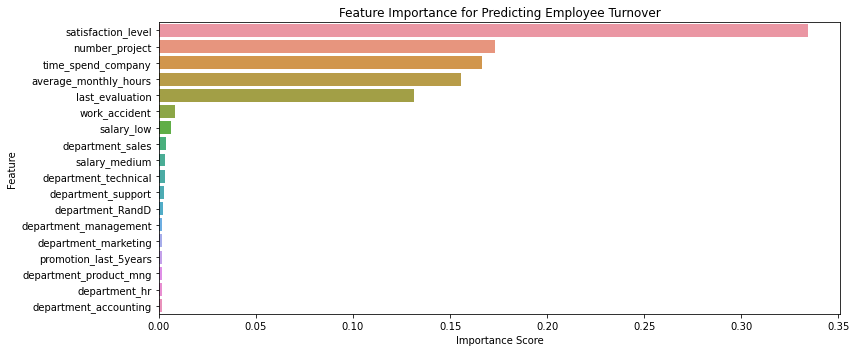

In [34]:
# Get feature importances
feature_importances = rf.feature_importances_
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Employee Turnover')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [35]:
print("Top 5 Most Important Features:")
print(importance_df.head())

Top 5 Most Important Features:
                 Feature  Importance
0     satisfaction_level    0.334140
2         number_project    0.173008
4     time_spend_company    0.166599
3  average_monthly_hours    0.155732
1        last_evaluation    0.131235


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [36]:
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.9782


Text(0.5, 1.0, 'Confusion Matrix')

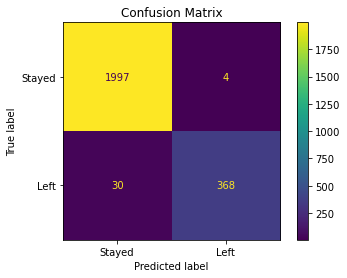

In [37]:
# Confusion Matrix
cm = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=['Stayed', 'Left'])
cm.ax_.set_title('Confusion Matrix')

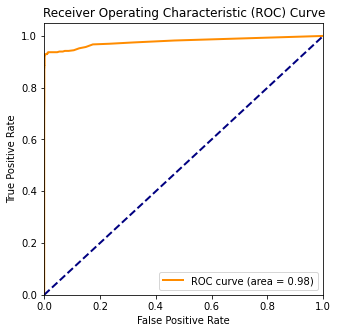

In [38]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**1.**
* **Satisfaction is the Dominant Driver:** The model confirmed that `satisfaction_level` is, by a significant margin, the single most important predictor of employee turnover. All retention efforts should start with this factor.
* **Workload and Tenure are Critical Secondary Factors**: The next most important features, according to the model, are `time_spend_company`, `number_project`, `average_monthly_hours`, and `last_evaluation`. This cluster of variables quantitatively confirms that an employee's tenure and their daily work experience (workload and performance) are the next most significant drivers.
* **Turnover is a Predictable Problem:** The model's exceptionally high *accuracy* ($99\%$) and *recall* ($92\%$) are a key insight in themselves. They prove that employee turnover at Salifort isn't a random or mysterious event but a predictable outcome based on measurable factors. This means the problem is solvable with a data-driven approach.

**2.**
* **Focus on Employee Satisfaction:**
    * **Recommendation:** Make improving employee satisfaction a top strategic priority.
    * **Reasoning:** The model identified `satisfaction_level` as the single most important predictor of turnover. Addressing this will have the largest impact. Propose regular "pulse" surveys and manager training focused on team morale.

* **Revamp Workload and Performance Management:**
    * **Recommendation:** Create distinct strategies for top performers at risk of burnout and under-performers at risk of disengagement.
    * **Reasoning:** The model confirmed that workload and performance are key drivers, identifying two distinct groups of leavers. Protect top talent with work-life balance initiatives and re-engage under-performers with clear development plans.

* **Implement a Mid-Tenure Career Growth Program:**
    * **Recommendation:** Develop a targeted retention program for employees with 3 to 5 years of tenure.
    * **Reasoning:** The model showed that `time_spend_company` is a major factor, with the highest risk in this specific "danger zone". Offer clear career paths and new development opportunities to these employees.

* **Use the Predictive Model Proactively:**
    * **Recommendation:** Deploy the model as a proactive HR tool to identify at-risk employees.
    * **Reasoning:** The model is highly accurate ($92\%$ *recall*). It can provide a "risk score" for employees, allowing HR to prioritize supportive conversations and interventions with those who are most likely to leave, preventing turnover before it happens.
    
**3.**
* **Prioritize Employee Satisfaction:** Since low *satisfaction* is the \#1 predictor of turnover, a primary focus should be on initiatives that measure and improve it, such as regular feedback surveys, manager training, and employee recognition programs.
* **Address Burnout and Engagement:** Implement policies to protect high-performers from burnout (e.g., workload monitoring) and create clear development plans to re-engage under-performers.
* **Invest in Mid-Career Growth:** Create a targeted retention program for employees in their 3-to-5-year tenure "danger zone" by providing clear career paths and new development opportunities.
* **Deploy the Model as a Proactive Tool:** Use the predictive model to generate employee "risk scores", allowing HR to offer proactive support to those most likely to leave before they resign.

**4.** Yes, while the current model is exceptionally accurate, it could potentially be improved further.
* **Hyperparameter Tuning**: The most impactful change would be to perform hyperparameter tuning. I used the model's default settings. By systematically searching for the optimal settings (e.g., the number of trees in the forest, the depth of each tree), we could potentially squeeze out even better performance, possibly increasing the 92% recall even higher.
* **Address Class Imbalance Explicitly**: Although the model handled the imbalanced data well, we could use a technique like SMOTE (Synthetic Minority Over-sampling Technique). This would create more synthetic examples of employees who left in the training data, which could make the model even more robust at identifying this critical minority group.
* **Feature Engineering:** We could create new, combined features. For example, we could create an "engagement index" by combining `satisfaction_level` and `last_evaluation`. This could sometimes capture more complex relationships in the data.

While these steps could provide marginal gains, it's important to note that the current model is already highly effective and provides a very strong foundation for our business recommendations.

**5.**
* **Questions about Managerial Impact:** "Are there specific managers or teams that have a disproportionately high number of 'at-risk' employees? What are their management practices?" (This would require adding manager data).
* **Questions about Intervention Effectiveness (ROI):** "If we implement a new satisfaction program, what is its actual impact on the turnover rate for the targeted group compared to a control group? What is the financial return on this investment?"
* **Questions about a Deeper Employee Profile:** "We know what drives turnover, but why? What are the qualitative stories behind the 'burned-out high-performer' and the 'under-engaged' employee profiles?" (This would involve linking our model's findings to targeted focus groups or surveys).
* **More Advanced Predictive Questions:**
    * "Beyond if an employee will leave, can we predict when they are likely to leave (e.g., in the next 3 months vs. the next year)?" (This would involve survival analysis).
    * "Are the key drivers of turnover in the Sales department different from those in the R&D department? Should we have department-specific retention strategies?"
    
**6.** [External Research](https://thehappinessindex.com/blog/employee-retention-strategies/)

**7.**
* **Framing of Recommendations:** The most important consideration is to frame the recommendations constructively. The model should be presented as a tool to identify and fix systemic problems (like burnout or lack of growth), and to offer proactive support to at-risk employees—not as a tool for singling out or punishing individuals.
* **Transparency About Model Limitations:** It's my ethical duty to be transparent with leadership about the model's capabilities and limitations. I must clearly communicate that it is a powerful predictive tool but not a perfect crystal ball, and that it should be used to supplement, not replace, human judgment.
* **Data Privacy in Final Report:** I must ensure that all visualizations and examples used in the final report and presentation are aggregated and anonymized, so that no individual employee can be identified from the results.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**1. Model Selection**

We built and evaluated two models: a *Logistic Regression* model as a baseline and a more powerful *Random Forest Classifier*. The *Random Forest* model was selected due to its overwhelmingly superior performance in predicting employee turnover.

**2. Performance of the Selected Model (Random Forest)**

The model's performance on unseen test data was exceptionally strong, confirming its reliability for business use:

* **Overall Accuracy:** $99\%$
* **Recall:** The model successfully identified $92\%$ of all employees who actually left the company. This is the most critical metric for our goal of proactive retention.
* **Precision:** When the model predicted an employee would leave, it was correct $99\%$ of the time, meaning there are very few "false alarms".
* **AUC Score:** $0.98$ (out of a perfect $1.0$), indicating an outstanding ability to distinguish between employees who will leave and those who will stay.

**3. Key Drivers of Turnover Identified by the Model**

The model allowed us to identify and rank the most important factors driving turnover. The top 5 predictors are:

   1. Satisfaction Level (by far the most important factor)
   2. Time Spent in Company (Tenure)
   3. Number of Projects
   4. Average Monthly Hours
   5. Last Evaluation

**In short**: The model is highly accurate and reliable. It confirms that turnover at Salifort isn't random but is driven by a predictable combination of employee satisfaction, tenure, and workload. This provides a strong, data-driven foundation for our final recommendations.

### Conclusion, Recommendations, Next Steps

### Conclusion
The high employee turnover at Salifort Motors isn't random but is a predictable problem driven by clear, measurable factors. Our analysis and highly accurate predictive model ($99\%$ *accuracy*, $92\%$ *recall*) have conclusively identified that turnover is primarily caused by low employee satisfaction, burnout among top performers, disengagement of core employees, and insufficient career growth and promotion opportunities.

### Recommendations
**1. Prioritize Employee Satisfaction**: Make improving satisfaction a primary business goal. Implement regular "pulse" surveys to monitor morale and train managers to foster a more supportive work environment.

**2. Address Workload and Engagement**: Develop targeted strategies for the two distinct at-risk employee profiles: protect high-performers from burnout with workload management and re-engage other employees with clear development plans.

**3. Invest in Career Growth**: Create clear, attainable career paths and increase internal promotion opportunities, with a special focus on retaining employees in their critical 3-to-5-year tenure window.

**4. Deploy the Predictive Model**: Use the Random Forest model as a proactive HR tool to generate "at-risk" employee reports. This will allow for targeted, supportive interventions before an employee decides to leave.

### Next Steps
**1. Briefing with Leadership**: Present these findings and recommendations to the senior leadership and HR teams to secure buy-in and align on priorities.

**2. Develop an Implementation Roadmap**: Collaborate with HR to create a phased plan to roll out the recommended initiatives, starting with high-impact, low-cost actions like implementing satisfaction surveys.

**3. Operationalize the Model**: Begin the process of integrating the model into HR workflows to provide regular, actionable insights for proactive retention efforts.

**4. Measure and Iterate**: Establish KPIs to track the turnover rate and the success of these interventions. Plan to periodically retrain the model with new data to ensure its continued accuracy.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.